In [1]:
import pandas as pd

# Syntax

The online textbook [Coding for Economists](https://aeturrell.github.io/coding-for-economists/intro.html) has a great [section summarizing the differences in syntax](https://aeturrell.github.io/coding-for-economists/coming-from-stata.html) between Stata and Python. This chapter does not aim to replace the key material included there. Instead, I hope it can serve as a supplement for those transitioning from Stata to Python.

This chapter will aim to describe [`stata2python`](https://pypi.org/project/stata2python/), a Python package where you can write Stata commands and recieve the equivalent code for them in Python.

## stata2python

### Installation and Import

To install `stata2python`, you can simply use the package installer [`pip`](https://pypi.org/project/pip/). An example is shown below. To do so, simply run the following command in your terminal.

    pip install --upgrade stata2python
    
After you have installed the package, you can simply import it into your Jupyter notebook. Alternatively, you can also access a [Python shell](https://www.tutorialsteacher.com/python/python-interective-shell) ( by typing `python3` in your terminal) and begin using it. To import the package in your notebook/shell, the following syntax is encouraged.

    from stata2python import stata2python
   
We import the package below.

In [2]:
from stata2python import stata2python

We also import in sample NBA, (log) wage and pollution datasets that will be helpful for demonstrating the features of our package.

In [3]:
nba = pd.read_csv("data/nba.csv") # NBA dataset
nba.head()

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
0,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,1,0
1,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,1,1
2,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,1,0
3,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,1,0
4,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,1,0


In [4]:
wages = pd.read_csv("data/la.csv") # (Log) Wages dataset
wages.head()

,hispanic,citizen,black,exp,wage,female,education
0,1,1,0,14.0,5.288462,1,9
1,0,1,0,14.7,8.461538,1,13
2,0,1,0,14.7,10.416667,1,13
3,0,1,0,14.0,21.634615,1,14
4,1,0,0,12.0,3.365385,1,12


In [5]:
pollution = pd.read_csv("data/pollution.csv") # Pollution dataset
pollution.head()

,year,countryname,countrycode,gdp,gdppc,co2,co2pc,population,oecd
0,2010,Zambia,ZMB,9.799629e+09,741.4421,2427.554,0.183669,13216985,0.0
1,2010,French Polynesia,PYF,NaN,NaN,883.747,3.296764,268065,0.0
2,2010,Monaco,MCO,NaN,NaN,NaN,NaN,36845,0.0
3,2010,Ukraine,UKR,9.057726e+10,1974.6212,304804.720,6.644867,45870700,0.0
4,2010,"Venezuela, RB",VEN,1.750000e+11,6010.0270,201747.340,6.946437,29043283,0.0


### Usage

Currently, `stata2python` only supports commands necessary to teach an introductory course in econometrics. If you would like to contribute, feel free to create pull requests [here](https://github.com/rohanjha123/data-h195/tree/main/creating_package). Below, we discuss the commands currently supported by the package.

By importing `stata2python` via the command `from stata2python import stata2python`, you can access a function named `stata2python`. You can enter in any Stata command as a string to this function. If the command is supported by `stata2python`, the function will output Python code equivalent to the Stata command. 

Optionally, you may also specify the name of the DataFrame you're working with via the `df_name` parameter in `stata2python`. The default value for `df_name` is simply `df`. 

Note that the provided Python code will (naturally) require you to have `pandas` installed, and may also require you to have the Python packages `numpy`, `scipy`, `matplotlib`, and `statsmodels` installed. The provided code will include all imports necessary (including `import pandas as pd`).

Below, we discuss all the features currently supported by `Stata2Python`, along with providing example usages.

#### T-tests

This function helps users determine the code for running [t-tests](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test.html) in Python. Examples include:

In [6]:
stata2python("ttest wage, by(guard)")

import pandas as pd
import numpy as np
from scipy import stats
### First, we must filter the DataFrame to obtain the right values
catvar_vals = np.unique(df['guard'])
df_1 = df[df['guard'] == catvar_vals[0]]
df_2 = df[df['guard'] == catvar_vals[1]]
### Then, we can run our t-test
stats.ttest_ind(df_1['wage'], df_2['wage'], equal_var=True, nan_policy='propagate')


In [7]:
stata2python("ttest wage, by(guard) unequal", "nba")

import pandas as pd
import numpy as np
from scipy import stats
### First, we must filter the DataFrame to obtain the right values
catvar_vals = np.unique(nba['guard'])
df_1 = nba[nba['guard'] == catvar_vals[0]]
df_2 = nba[nba['guard'] == catvar_vals[1]]
### Then, we can run our t-test
stats.ttest_ind(df_1['wage'], df_2['wage'], equal_var=False, nan_policy='propagate')


Assuming you have all the correct packages installed, you can directly copy paste this code to see the output. For example, 

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
### First, we must filter the DataFrame to obtain the right values
catvar_vals = np.unique(nba['guard'])
df_1 = nba[nba['guard'] == catvar_vals[0]]
df_2 = nba[nba['guard'] == catvar_vals[1]]
### Then, we can run our t-test
stats.ttest_ind(df_1['wage'], df_2['wage'], equal_var=False, nan_policy='propagate')

TtestResult(statistic=2.1432820571177977, pvalue=0.03299634994484977, df=266.3682612357414)

#### Generating new columns

Used for generating new columns. For example,

In [9]:
stata2python("gen degree = (coll >= 4)")

import pandas as pd
df['degree'] = df['coll'] >= 4


In [10]:
stata2python("gen productivity = points/(minutes/games)","nba")

import pandas as pd
nba['productivity'] = nba['points']/(nba['minutes']/nba['games'])


Copy-pasting the output into Python to verify it works.

In [29]:
import pandas as pd
nba['productivity'] = nba['points']/(nba['minutes']/nba['games'])

In [12]:
nba # You can see that the productivity column was successfully generated

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children,productivity
0,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,1,0,0.429717
1,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,1,1,0.363571
2,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,1,0,0.386423
3,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,1,0,0.279287
4,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,1,0,0.430344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,20,3,3,11.0,1,33.39,1,0,0.598939
265,1,715.0,5,31,4,75,1084,0,1,0,5,3,1,54.0,0,14.45,1,1,0.345941
266,1,600.0,11,33,3,67,1197,1,0,0,10,2,2,4.0,0,17.87,1,1,0.559733
267,0,2500.0,6,28,4,78,2113,0,0,1,16,6,2,2.0,0,27.09,0,0,0.590629


#### Describing the Data

Used for summarizing the dataframe. For example,

In [13]:
stata2python("describe","nba")

import pandas as pd
nba.describe()


In [30]:
import pandas as pd # Verifying that the output works
nba.describe()

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children,productivity
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,240.00000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.442379,1423.827509,5.118959,27.394052,3.717472,65.724907,1682.193309,0.420074,0.408922,0.171004,10.260223,4.468401,2.453532,20.20000,0.115242,23.979257,0.806691,0.345725,0.409677
std,0.497595,999.774074,3.400062,3.391292,0.754410,18.851110,893.327771,0.494491,0.492551,0.377214,5.882489,2.892980,2.148124,18.73582,0.319909,9.731086,0.395629,0.476491,0.114920
min,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,2.890000,0.000000,0.000000,0.093851
25%,0.000000,650.000000,2.000000,25.000000,4.000000,57.000000,983.000000,0.000000,0.000000,0.000000,5.000000,2.000000,1.000000,7.00000,0.000000,16.730000,1.000000,0.000000,0.338710
50%,0.000000,1186.000000,4.000000,27.000000,4.000000,74.000000,1690.000000,0.000000,0.000000,0.000000,9.000000,4.000000,2.000000,14.50000,0.000000,24.820000,1.000000,0.000000,0.408560
75%,1.000000,2014.500000,7.000000,30.000000,4.000000,79.000000,2438.000000,1.000000,1.000000,0.000000,14.000000,6.000000,3.000000,28.25000,0.000000,33.260000,1.000000,1.000000,0.471168
max,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3533.000000,1.000000,1.000000,1.000000,30.000000,17.000000,13.000000,139.00000,1.000000,43.090000,1.000000,1.000000,0.748532


#### Correlation Matrix

Used for generating a correlation matrix between relevant variables. For example, 

In [31]:
stata2python("corr points assists rebounds", "nba")

import pandas as pd
nba[['points', 'assists', 'rebounds']].corr()


In [32]:
import pandas as pd # Verifying that the output works
nba[['points', 'assists', 'rebounds']].corr()

,points,assists,rebounds
points,1.000000,0.539269,0.563324
assists,0.539269,1.000000,0.059956
rebounds,0.563324,0.059956,1.000000


#### Scatter Plots

Used for making scatter (or twoway) plots. For example,

In [33]:
stata2python("twoway (scatter co2pc population, xtitle('co2pc') ytitle('population'))","pollution")

import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(pollution['co2pc'], pollution['population']);
plt.xlabel('co2pc');
plt.ylabel('population');


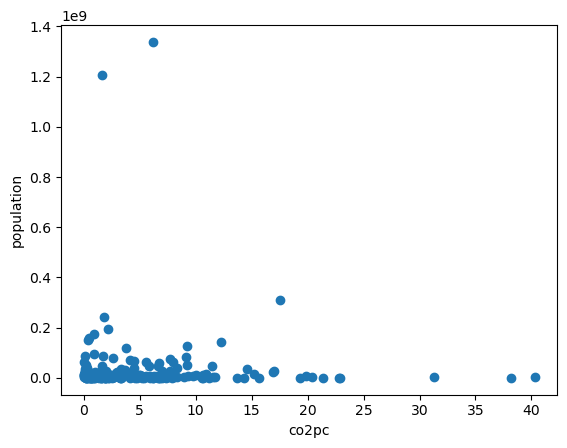

In [34]:
import pandas as pd # Verifying that the output works
import matplotlib.pyplot as plt
plt.scatter(pollution['co2pc'], pollution['population']);
plt.xlabel('co2pc');
plt.ylabel('population');

#### Histograms

Used for generating histograms. For example,

In [19]:
stata2python("histogram co2pc, bin(80)", "pollution")

import pandas as pd
import matplotlib.pyplot as plt
pollution.hist(column='co2pc',bins=80);


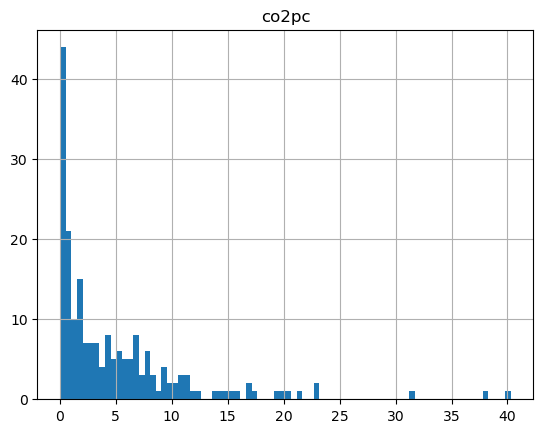

In [35]:
import pandas as pd # Verifying that the output works
import matplotlib.pyplot as plt
pollution.hist(column='co2pc',bins=80);

#### Regressions

Used for running regressions, including Python comments to help explain relevant portions of the code. Note that not all features from Stata's `reg` command are supported. Examples include:

In [21]:
stata2python("reg wage exp", "wages")

import pandas as pd
import statsmodels.api as sm
### Dropping NaN/missing values
wages_no_na = wages[['exp','wage']].dropna()
### Below, we extract the relevant variables from the DataFrame
x_df = wages_no_na['exp']
y_df = wages_no_na['wage']
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df))
result = model.fit()
result.summary()


In [36]:
import pandas as pd # Verifying that the output works
import statsmodels.api as sm
### Dropping NaN/missing values
wages_no_na = wages[['exp','wage']].dropna()
### Below, we extract the relevant variables from the DataFrame
x_df = wages_no_na['exp']
y_df = wages_no_na['wage']
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4714
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.493
Time:                        21:26:39   Log-Likelihood:                -3541.0
No. Observations:                 863   AIC:                             7086.
Df Residuals:                     861   BIC:                             7096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0816      3.917      4.105      0.000       8.393      23.771
exp           -0.2135      0.311     -0.687      0.493      -0.824       0.397
==============================================================================
Omnibus:                     1263.062   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413853.334
Skew:                           8.176   Prob(JB):                         0.00
Kurtosis:                     109.028   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
stata2python("reg wage exp, vce(cluster education)")

import pandas as pd
import statsmodels.api as sm
### We first perform some string manipulations to ensure we are appropripately accounting for strings. 
### This section seems complicated as this code is meant to be a general-purpose code for converting the Stata commands to Python.
### You can greatly simplify this step if you know exactly which variables you are interested in; simply extract those variables from the DataFrame directly.
y_var = "wage"
clustering_vars = ['education']
### Dropping NaN/missing values
df_no_na = df[['exp', 'education','wage']].dropna()
### Below, we extract the relevant variables from the DataFrame
x_df = df_no_na['exp']
y_df = df_no_na['wage']
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df))
result = model.fit(cov_type='cluster', cov_kwds={'groups': df_no_na['education']})
result.summary()


In [24]:
stata2python("reg wage exp i.female, vce(cluster education)", "wages")

import pandas as pd
import statsmodels.api as sm
### We first perform some string manipulations to ensure we are appropripately accounting for strings. 
### This section seems complicated as this code is meant to be a general-purpose code for converting the Stata commands to Python.
### You can greatly simplify this step if you know exactly which variables you are interested in; simply extract those variables from the DataFrame directly.
y_var = "wage"
clustering_vars = ['education']
wages_with_dummies = wages.copy()
x_var = "'exp', 'i.female'"
x_var_new = "'" + "', '".join([i.strip("'") for i in x_var.split(", ") if not i.strip("'").startswith("i.")]) + "'"
### The below section adds in relevant indicator variables, ensuring they have interpretable names
indicator_list = [m.strip("'") for m in x_var.split('i.')[1:]]
for indicator in indicator_list:
    dummies = pd.get_dummies(wages_with_dummies[indicator])
    dummies = dummies.iloc[:,1:]
    dummies.columns = [str(x) + '_' + str(ind

In [37]:
import pandas as pd # Verifying that the output works
import statsmodels.api as sm
### We first perform some string manipulations to ensure we are appropripately accounting for strings. 
### This section seems complicated as this code is meant to be a general-purpose code for converting the Stata commands to Python.
### You can greatly simplify this step if you know exactly which variables you are interested in; simply extract those variables from the DataFrame directly.
y_var = "wage"
clustering_vars = ['education']
wages_with_dummies = wages.copy()
x_var = "'exp', 'i.female'"
x_var_new = "'" + "', '".join([i.strip("'") for i in x_var.split(", ") if not i.strip("'").startswith("i.")]) + "'"
### The below section adds in relevant indicator variables, ensuring they have interpretable names
indicator_list = [m.strip("'") for m in x_var.split('i.')[1:]]
for indicator in indicator_list:
    dummies = pd.get_dummies(wages_with_dummies[indicator])
    dummies = dummies.iloc[:,1:]
    dummies.columns = [str(x) + '_' + str(indicator) for x in dummies.columns]
    wages_with_dummies = pd.concat([wages_with_dummies,dummies],axis=1)
    x_var_new = x_var_new + ", '" + "', '".join(dummies.columns) + "'"
x_var = x_var_new
### This helps ensure the clustered variables are extracted from the DataFrame
if clustering_vars:
    x_var_temp = x_var + ", '" + "', '".join(clustering_vars) + "'"
var_list = x_var_temp +", '"+ str(y_var) + "'"
### Dropping NaN/missing values
wages_with_dummies_no_na = wages_with_dummies[[i.strip("'") for i in var_list.split(", ")]].dropna()
### Below, we extract the relevant variables from the DataFrame
x_df = wages_with_dummies_no_na[[i.strip("'") for i in x_var.split(", ")]]
y_df = wages_with_dummies_no_na['wage']
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df))
result = model.fit(cov_type='cluster', cov_kwds={'groups': wages_with_dummies_no_na['education']})
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.993
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.183
Time:                        21:26:54   Log-Likelihood:                -3538.0
No. Observations:                 863   AIC:                             7082.
Df Residuals:                     860   BIC:                             7096.
Df Model:                           2                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4218      3.698      4.712      0.000      10.175      24.669
exp           -0.2373      0.206     -1.153      0.249      -0.640       0.166
1_female      -2.4604      1.261     -1.951      0.051      -4.932       0.011
==============================================================================
Omnibus:                     1260.198   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409372.994
Skew:                           8.142   Prob(JB):                         0.00
Kurtosis:                     108.449   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""